## 데이터 수집

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
from konlpy.tag import Twitter
from lxml import html
from collections import Counter
from datetime import datetime, timedelta

import pandas as pd
import re
import random
import pytagcloud      # requires Korean font support
import webbrowser
import nltk

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


### 언론사 제목 수집(조선,세계,한겨레)

### URL 입력

In [4]:
urls = []
url = input("url 주소를 입력하세요. \n정치 : http://www.segye.com/newsList/0101010100000?curPage=\n경제 : http://www.segye.com/newsList/0101030100000?curPage=\n사회 : http://www.segye.com/newsList/0101080100000?curPage= \n")
for x in range(1, 1000):
    urls.append('%s%d' % (url, x))

url 주소를 입력하세요. 
정치 : http://www.segye.com/newsList/0101010100000?curPage=
경제 : http://www.segye.com/newsList/0101030100000?curPage=
사회 : http://www.segye.com/newsList/0101080100000?curPage= 
http://www.segye.com/newsList/0101030100000?curPage=


In [5]:
len(urls)

999

In [6]:
urls

['http://www.segye.com/newsList/0101030100000?curPage=1',
 'http://www.segye.com/newsList/0101030100000?curPage=2',
 'http://www.segye.com/newsList/0101030100000?curPage=3',
 'http://www.segye.com/newsList/0101030100000?curPage=4',
 'http://www.segye.com/newsList/0101030100000?curPage=5',
 'http://www.segye.com/newsList/0101030100000?curPage=6',
 'http://www.segye.com/newsList/0101030100000?curPage=7',
 'http://www.segye.com/newsList/0101030100000?curPage=8',
 'http://www.segye.com/newsList/0101030100000?curPage=9',
 'http://www.segye.com/newsList/0101030100000?curPage=10',
 'http://www.segye.com/newsList/0101030100000?curPage=11',
 'http://www.segye.com/newsList/0101030100000?curPage=12',
 'http://www.segye.com/newsList/0101030100000?curPage=13',
 'http://www.segye.com/newsList/0101030100000?curPage=14',
 'http://www.segye.com/newsList/0101030100000?curPage=15',
 'http://www.segye.com/newsList/0101030100000?curPage=16',
 'http://www.segye.com/newsList/0101030100000?curPage=17',
 'http

### 하나의 페이지 테스트

In [7]:
url = urls[0]
html = urlopen(url)
data = BeautifulSoup(html, "lxml")

In [8]:
data

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="세계일보" name="Author"/>
<meta content="세계일보" name="Description"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="//img.segye.com/resourcesimages/favicon-segye1.ico" rel="shortcut icon"/>
<link href="//img.segye.com/resources/css/segye2016.css" rel="stylesheet" type="text/css"/>
<title>세상을 보는 눈, 글로벌 미디어 - 세계일보 -</title>
</head>
<!-- Google Tag Manager -->
<body><noscript><iframe height="0" src="//www.googletagmanager.com/ns.html?id=GTM-KDPKKS" style="display:none;visibility:hidden" width="0"></iframe></noscript>
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'

In [9]:
data_temp = data.find_all('div', 'newslist_area')

In [10]:
len(data_temp)

1

#### 제목 가져오기

In [11]:
data_title = data_temp[0].find_all('dt', 'title_cr')

In [12]:
data_title[0]

<dt class="title_cr"><a href="/newsView/20181118001744" target="_self">단순노무직 5년 만에 최대폭 감소</a></dt>

In [13]:
data_title[-1]

<dt class="title_cr"><a href="/newsView/20181116002315" target="_self">한국체인스토어협회, 2019년 유통 키워드는'5 Free(프리)'</a></dt>

In [14]:
len(data_title)

20

In [15]:
data_title[0].get_text()

'단순노무직 5년 만에 최대폭 감소'

In [16]:
re.sub('[\'\n\r\t\xa0]', '', data_title[0].get_text())

'단순노무직 5년 만에 최대폭 감소'

#### 날짜 가져오기

In [17]:
data_date = data_temp[0].find_all('span', 'date')

In [18]:
data_date[0]

<span class="date">2018.11.18</span>

In [19]:
data_date[-1]

<span class="date">2018.11.17</span>

In [20]:
len(data_date)

20

In [21]:
data_date[0].get_text()

'2018.11.18'

### 데이터 수집 및 확인

### 언론사(세계)

In [22]:
title = []
date = []
page = 0

start_flag = False
end_flag = False

end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
end_date = end_date[:4] + '.' + end_date[4:6] + '.' + end_date[6:]
start_date = start_date[:4] + '.' + start_date[4:6] + '.' + start_date[6:]

print("=" * 50)
print("[%s ~ %s] 데이터 수집을 시작합니다.\n" % (end_date, start_date))

start = datetime.now()

for url in urls:
    html = urlopen(url)
    data = BeautifulSoup(html, "lxml")    
    data_temp = data.find_all('div', 'newslist_area')
    
    # 기사 제목 및 날짜 찾기
    data_title = data_temp[0].find_all('dt', 'title_cr')
    data_date = data_temp[0].find_all('span', 'date')
    
    # 데이터수집 체크
    page += 1
    
    if start_flag:
        print("%d 페이지 수집중입니다.... ing" %page, end='')
    
    for x in range(len(data_title)):
        
        # 기사 끝날 날짜 체크 (end_flag 변경)
        if data_date[x].get_text() in end_date:
            temp_date = data_date[x].get_text()
            end_flag = True

        # 기사 끝날 날짜 체크(반복문 out)    
        if end_flag:
            if not(temp_date == data_date[x].get_text()):
                break       
        
        
        if not(start_flag):            
            # 기사 시작 날짜 체크
            if not(data_date[x].get_text() in start_date):            
                continue
            print("%d 페이지 수집중입니다.... ing" %page, end='')
            start_flag = True
        
  
        
        # 기사 제목만 가져오기
        title.append(re.sub('[\'\n\r\t\xa0]', '', data_title[x].get_text()))
   
        # 기사 날짜만 가져오기
        date.append(data_date[x].get_text())
        

    # 데이터 수집 시작 체크
    if not(start_flag):
        continue
        
    # 데이터수집 체크
    print("     [수집완료]")       
          
    
    # 기사 끝날 날짜 체크(반복문 out)  
    if end_flag:
        if not(temp_date == data_date[x].get_text()):
            break 

        
end = datetime.now()
print("=" * 50)
print("데이터 수집을 완료했습니다.")
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
print('총 수집 개수: %d개' %len(title))

시작 날짜를 입력하세요.  ex) 20181007 
20181115
마지막 날짜를 입력하세요.  ex) 20181115 
20181118
[2018.11.15 ~ 2018.11.18] 데이터 수집을 시작합니다.

1 페이지 수집중입니다.... ing     [수집완료]
2 페이지 수집중입니다.... ing     [수집완료]
3 페이지 수집중입니다.... ing     [수집완료]
4 페이지 수집중입니다.... ing     [수집완료]
5 페이지 수집중입니다.... ing     [수집완료]
데이터 수집을 완료했습니다.
총 계산 시간: 0:00:02.477141
총 수집 개수: 89개


In [23]:
len(title)

89

In [24]:
len(date)

89

In [25]:
title[0]

'단순노무직 5년 만에 최대폭 감소'

In [26]:
date[0]

'2018.11.18'

In [27]:
title[-1]

'‘계열사 고의 누락’ 이건희 회장 고발'

In [28]:
date[-1]

'2018.11.15'

### DataFrame 만들기 & 파일로 저장하기

In [29]:
df_temp = {'Title' : title, 'Date' : date}
df = pd.DataFrame(df_temp)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
Title    89 non-null object
Date     89 non-null object
dtypes: object(2)
memory usage: 1.5+ KB


In [31]:
df.head(10)

,Title,Date
0,단순노무직 5년 만에 최대폭 감소,2018.11.18
1,"BBQ, 치킨값 19일 인상…황금올리브 등 2000원 올라",2018.11.18
2,"첫 업종별 사회적대화, 금융산업위원회 발족",2018.11.18
3,BBQ 윤학종 대표 돌연 사임…지난해 이어 CEO 줄사임,2018.11.18
4,화장품업체들 3분기에도 ‘실적 충격’,2018.11.18
5,"최저기온 영하로 뚝, 겨울추위 본격 시작…보일러관리 4가지 Tip [이슈탐색]",2018.11.18
6,"나 혼자 사는 1인가구, 내 몸은 내가 지킨다 [김현주의 일상 톡톡]",2018.11.18
7,한국 산업용 로봇활용 세계 1위…“일자리와 보완 관계 가능”,2018.11.17
8,반전없는 고용부진…친기업 행보 속도낼까,2018.11.17
9,저출산 속에도 육아 전담 남편수 12개월 연속 늘었다,2018.11.17


In [32]:
df.tail(10)

,Title,Date
79,"9·13대책 발표 두 달…""2억∼3억원 내려도 집 안 팔려""",2018.11.15
80,"""관세는 내렸는데…수입 초콜릿·고가 맥주 가격은 오히려 올라""",2018.11.15
81,㈜한라 천진법인 청산에 따른 243억원 투자금 회수,2018.11.15
82,"오티스, 2018 한국국제승강기엑스포서 차세대 혁신기술 선보여",2018.11.15
83,"도공, 내년 2월부터 고속도로 모든 휴게공간에 무료 와이파이서비스 제공",2018.11.15
84,"코레일, 국내 유일‘철도교통 관제교육 기관’ 지정 박차",2018.11.15
85,"일본 농림어업신용보증기금, 한국 농신보 포항센터 방문",2018.11.15
86,"이베이코리아·우정사업본부, 소상공인·지역경제 활성화 위한 업무협약 체결",2018.11.15
87,[이코노 브리핑] KB금융 대국민안전문화확산 MOU 외,2018.11.15
88,‘계열사 고의 누락’ 이건희 회장 고발,2018.11.15


### 결과 저장하기(주석 처리)

In [33]:
# Thema = input("주제를 입력하세요.  ex) society \n")
# df.to_csv('TeamMission/segye_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='UTF-8')

## 기사 단어 뽑기

### 저장된 데이터 가져오기

In [17]:
check = input("언론사 데이터를 가져오려면 : 1 \n국민청원 데이터를 가져오려면 : 2\n")

if check == "1":
    Thema = input("주제를 입력하세요.  ex) society \n")
    end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
    start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
    choose = input("제목만 가져오려면 : 1\n본문까지 가져오려면 : 2 \n")
    end_date = end_date[:4] + '.' + end_date[4:6] + '.' + end_date[6:]
    start_date = start_date[:4] + '.' + start_date[4:6] + '.' + start_date[6:]
else:
    thema = input("청원 분야를 입력하세요.\n- 일교/통일/국방 : 36 \n- 일자리 : 37 \n- 인권/성평등 : 49 \n")
    day = input("진행 중 청원 : 1, 만료된 청원 : 2 \n")
    end_date = input("시작 날짜를 입력하세요.  ex) 181007 \n")
    start_date = input("마지막 날짜를 입력하세요.  ex) 181115 \n")
    end_date = end_date[:2] + '.' + end_date[2:4] + '.' + end_date[4:]
    start_date = start_date[:2] + '.' + start_date[2:4] + '.' + start_date[4:]

언론사 데이터를 가져오려면 : 1 
국민청원 데이터를 가져오려면 : 2
2
청원 분야를 입력하세요.
- 일교/통일/국방 : 36 
- 일자리 : 37 
- 인권/성평등 : 49 
37
진행 중 청원 : 1, 만료된 청원 : 2 
1
시작 날짜를 입력하세요.  ex) 181007 
180101
마지막 날짜를 입력하세요.  ex) 181115 
181116


In [18]:
if check == "1":
    if choose == '1':
        word = pd.read_csv('./TeamMission/segye_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
    else:
        word = pd.read_csv('./TeamMission/segye_%s_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
else:
    word = pd.read_csv('./TeamMission/president_%s_%s_(%s - %s).csv' % (thema, day, end_date, start_date), sep=',', encoding='utf-8')

del word['Unnamed: 0']

In [19]:
word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 3 columns):
Title    1653 non-null object
Date     1653 non-null object
count    1653 non-null object
dtypes: object(3)
memory usage: 38.8+ KB


In [20]:
word.head(10)

,Title,Date,count
0,현제 최저임금을 안지키는 업주가있네요,18.11.16,2명
1,백종원의 골목식당 폐지를 원합니다,18.11.16,10명
2,밥 ㅊㅊ좀,18.11.16,1명
3,경비원 기사 보시구 법이 좀 바뀌었으면 합니다,18.11.16,8명
4,취업이 너무 힘듭니다.,18.11.16,9명
5,카풀 반대합니다,18.11.16,11명
6,대통령님 최저시급 다시 내려주세요...ㅠㅠㅠㅠ,18.11.16,17명
7,광주형 일자리 .연봉 4000만원에서 만족 할까요?,18.11.16,3명
8,문가는 남에자리에서 내려오라,18.11.16,7명
9,힘들어 못살겠다,18.11.16,3명


In [21]:
word.tail(10)

,Title,Date,count
1643,운송비 관련,18.10.20,0명
1644,일자리팔아먹는 용역업체를 없애주세요,18.10.20,8명
1645,사업주편인 알바몬 영업정지 및 폐업 청원합니다.,18.10.20,3명
1646,인천장애인공단청년성공패키지피해자,18.10.20,2명
1647,"왜! 경단녀만? 경력단절남성을 위한 취업가점제도(공무원, 공공기관 등)를 도입하지 ...",18.10.20,24명
1648,52시간근무제,18.10.20,1명
1649,안녕하세요,18.10.20,4명
1650,비정규직의 정규직화는 특정단체의 유리한 작용으로 변화,18.10.20,5명
1651,감정노동자에대한 처우대책이 필요합니다.,18.10.20,9명
1652,"음성군 보건소는 공공부문 비정규직 정규직 전환, 가이드 라인대로 이행해라",18.10.20,42명


In [22]:
len(word)

1653

#### DataFrame -> List -> String

In [24]:
words = str()

start = datetime.now()

if check == '1':
    if choose == '1':
        for i in range(len(list(word['Title']))):
            words += str(list(word['Title'])[i])
    else:
        for i in range(len(list(word['News']))):
            words += str(list(word['News'])[i])
else:
    for i in range(len(list(word['Title']))):
        words += str(list(word['Title'])[i])

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

총 계산 시간: 0:00:00.141008


In [25]:
words[:1000]

"현제 최저임금을 안지키는 업주가있네요백종원의 골목식당 폐지를 원합니다밥 ㅊㅊ좀경비원 기사 보시구 법이 좀 바뀌었으면 합니다취업이 너무 힘듭니다.카풀 반대합니다대통령님 최저시급 다시 내려주세요...ㅠㅠㅠㅠ광주형 일자리 .연봉 4000만원에서 만족 할까요?문가는 남에자리에서 내려오라힘들어 못살겠다죽어가는 중소기어교육청과 식약처는 학교급식 식자재 행정지도,관리 똑바로 하십시오. 중소기업일자리, 소득 팍팍 줄어듭니다.공공기관 취업 시 경단녀 가산점 조정 또는 폐지하거나 경단남자에게도 적용 바랍니다.척페청산 공정한 사회 일자리 창출을 외치던 촛불정부에서 이런일이 벌어졌어야 되겠습니까권성동, 염동렬, 전 강원랜드 사장에게 '구두로' 채용청탁을 하다!일자리 창출도 중용하지만 아웃소싱 회사의 갑질부터 고쳐주세요.일하고싶네요.사회적 약자를 향한 갑질 좀 멈추게 해주세요.비정규직 폐지 좀해주세요지방인재 가산점제도 폐지해주세요LG전자서비스 노조■ 국민은행 임원 정규직 친인척 채용비리  계열사 하청기업에 임원정규직 청년일자리 약탈이 조선을 망하게한 매관매직보다 심하다 전수조사후 임원정규직 파면하라 은행회장이 손녀채용의 모범을 보이니 임원 정규직 모두 계열사 하청기업 친인척채용비리가 무차별적 으로 자행되었다 일자리 약탈이란 죄의식도없다 더큰 문제는 이들이 원청기업 국민은행 임원정규직 힘을과시하며 직장내 갑질을 자행하고있다는점이다 하청기업 인력구조조정시 제일먼저 나가야마땅할 비리채용직원들이 힘없는 다른직원들을 몰아내는 사악한 갑질을 서슴치않고 이를위해 급조날조한 꼼수제도까지 만들어내다는것이다 대한민국 전공기업대기업에 만연한 이런행위들을 없애기위해 국민은행 비리 임원정규직들을 이번에 반드시 파면하여 한국전체에 본보기를 보여라 조선을 망하게한 매관매직 세습이 현대에 그망령이 되살아나고있다 끔찍한일이다노인일자리 올해보다 2배로 늘려야 어려운어르신분 모두 노인일자리 할 수 있어요내년에 노인일자리 조금 늘어나서 올해 노인일자리 하신분은 못할거라고 어떻게 사느냐고 걱정이세요놀고 먹는 공무원 그

In [26]:
len(words)

47344

#### 트위터로 단어 뽑기

In [27]:
start = datetime.now()

twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

C:\python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


총 계산 시간: 0:00:13.541775


#### 단어 분류

In [28]:
one_words = []
two_words = []
etc_words = []

for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(two_words), len(etc_words)

(1232, 6924, 2020)

In [29]:
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

len(one_words), len(two_words), len(etc_words)

(264, 1818, 600)

In [30]:
for word in one_words:
    print(word, end='\t')

앞	증	묵	절	현	뭘	항	난	말	집	온	흙	정	폭	상	눈	배	남	속	안	입	응	줄	카	젠	구	셨	봄	겨	적	당	차	거	빽	요	및	종	양	엽	빠	읍	버	꼬	울	싹	개	단	사	불	료	약	총	주	꾼	쌍	즉	팬	답	밥	놈	마	편	바	칙	때	국	재	함	키	았	갑	졸	것	팔	이	위	막	처	율	꿈	최	데	뭐	반	분	강	나	껀	물	추	척	힘	맘	일	치	계	빨	듸	도	죄	유	팩	회	합	를	감	연	등	햇	붐	년	특	박	봉	번	책	핵	식	방	생	쫌	또	창	폐	앱	핮	리	돌	살	누	시	걸	핸	무	윈	선	못	만	붖	터	파	체	액	왜	길	병	쥐	제	타	직	판	듯	월	덩	전	굴	뿐	평	더	빛	쇼	돈	과	포	점	명	알	뜻	수	해	송	외	둘	벌	건	겁	김	발	곳	실	귤	노	쑈	중	녀	신	채	빚	호	뼈	세	퇴	댓	촌	턱	게	빈	모	문	피	뇌	법	그	로	저	탈	땅	달	맛	친	른	급	관	맨	기	밑	범	뭔	짤	민	의	후	산	업	향	글	용	논	뒤	인	굼	자	쏙	술	청	내	욧	욕	군	애	멊	량	땀	움	겉	짓	질	좀	팀	층	보	스	란	염	듭	손	금	택	꼭	비	날	낮	여	삶	

#### stop_words 생성

In [31]:
stop_words = []
sw_time = ['오늘', '어제', '미래', '내일', '시작', '하루', '올해', '오전', '오후', '하루', '이번', '다시', '마지막','개월', '내년']
sw_various = ['알림','소식', '궂긴', '기업', '회장','최대','대통령','한국','청와대','대표','포토','의원','정부','정치','후보','추진','이유','달라','만난','누구','사진','직접','마련','리선']
sw_region = ['서울','인천','수원','용인','대전','대구','부산','울산','광주','제주','제주도']

stop_words.extend(one_words)
stop_words.extend(sw_time)
stop_words.extend(sw_various)
stop_words.extend(sw_region)
stop_words.extend(one_words)

#### stop_words 빼기

In [32]:
nouns = [word for word in nouns3 if word not in stop_words]
len(nouns)

8559

In [33]:
common_word2 = Counter(nouns)

In [34]:
common_word2 = common_word2.most_common()

In [35]:
wordname = []
wordfreq = []

for i in range(len(common_word2)):
    wordname.append(common_word2[i][0])
    wordfreq.append(common_word2[i][1])
    
    ecolist = pd.DataFrame({'단어명' : wordname, '빈도수':wordfreq})

In [36]:
ecolist.head()

,단어명,빈도수
0,일자리,250
1,채용,141
2,비리,112
3,청년,91
4,카풀,88


#### stop_word 실행한 데이터 저장

In [37]:
if check == "1":
    if choose == "1":
        ecolist.to_csv('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
        print('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (Thema, end_date, start_date))
    else:
        ecolist.to_csv('./TeamMission/segye_%s_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
        print('./TeamMission/segye_%s_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (Thema, end_date, start_date))
else:
    ecolist.to_csv('TeamMission/president_%s_%s_word_utf_(%s - %s).csv'% (thema, day, end_date, start_date), sep=',', encoding='utf-8')
    print('TeamMission/president_%s_%s_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (thema, day, end_date, start_date))
    

TeamMission/president_37_1_word_utf_(18.01.01 - 18.11.16).csv 파일을 생성했습니다.


#### 워드클라우드 만들기

In [38]:
token = nltk.Text(nouns, name='기사')
type(token), len(token)

(nltk.text.Text, 8559)

In [39]:
token.vocab().most_common(30)

[('일자리', 250),
 ('채용', 141),
 ('비리', 112),
 ('청년', 91),
 ('카풀', 88),
 ('시험', 85),
 ('고용', 83),
 ('반대', 75),
 ('정규직', 73),
 ('국민', 64),
 ('공인', 62),
 ('중개사', 62),
 ('취업', 57),
 ('경제', 54),
 ('세습', 52),
 ('조사', 49),
 ('청원', 48),
 ('인척', 47),
 ('교사', 46),
 ('정책', 45),
 ('처벌', 41),
 ('카카오', 39),
 ('대한민국', 38),
 ('불법', 38),
 ('공무원', 37),
 ('문제', 36),
 ('대한', 36),
 ('외국인', 36),
 ('제도', 35),
 ('폐지', 34)]

#### 워드클라우드 한글폰트 설정

In [40]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [41]:
data = token.vocab().most_common(1000)
len(data)

1000

In [42]:
data[:10]

[('일자리', 250),
 ('채용', 141),
 ('비리', 112),
 ('청년', 91),
 ('카풀', 88),
 ('시험', 85),
 ('고용', 83),
 ('반대', 75),
 ('정규직', 73),
 ('국민', 64)]

#### data를 딕셔너리 형태로 변환

In [43]:
dict_data = dict(data)
len(dict_data)

1000

#### 워드클라우드 그리기

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

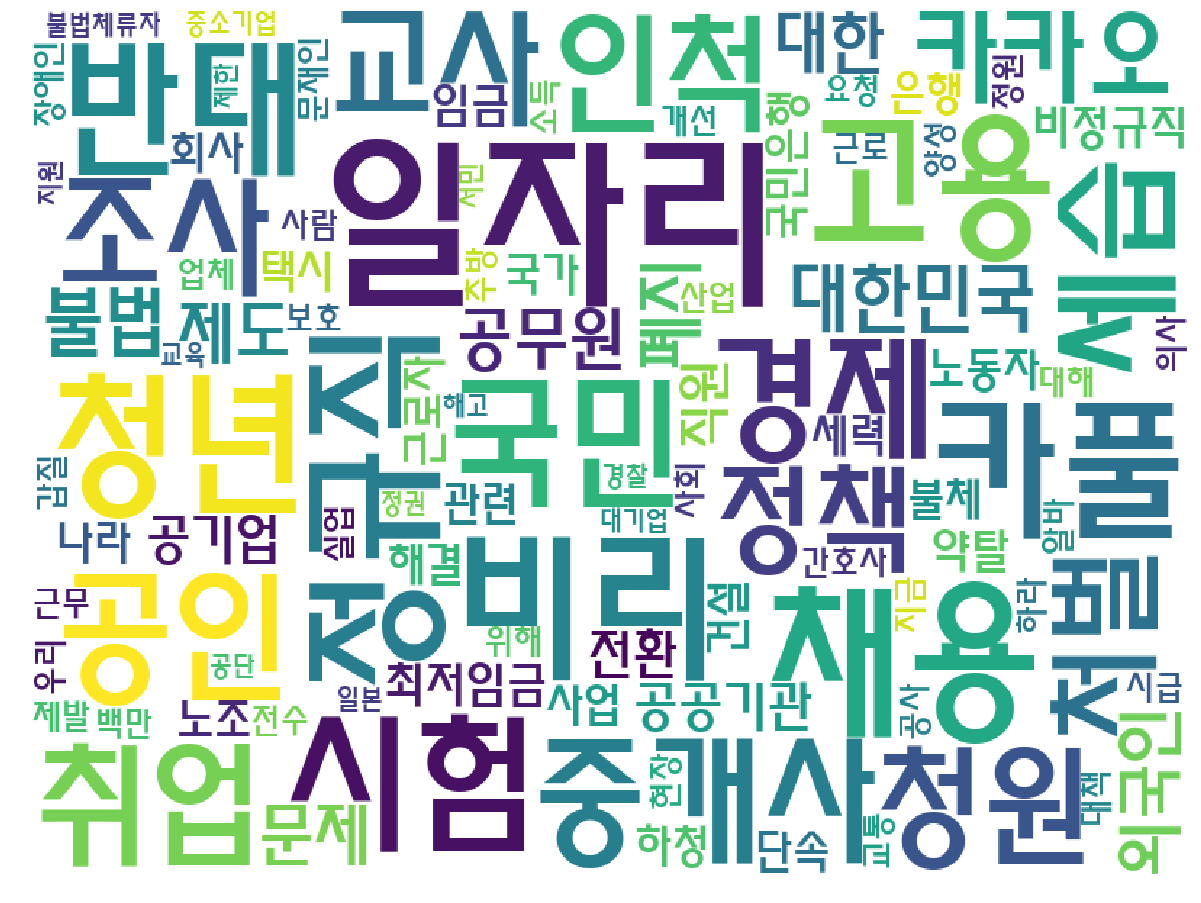

In [45]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
#     "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

if check == '1':
    if choose == '1':
        save_img = 'images/segye_%s_title_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
    else:
        save_img = 'images/segye_%s_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
else:
    save_img = 'images/president_%s_%s_(%s - %s).png' % (thema, day, end_date, start_date)
    
plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)

### 국민청원 데이터 정리

#### 데이터 읽어오기

In [2]:
president_36_1 = pd.read_csv('./TeamMission/president_36_1_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_36_2 = pd.read_csv('./TeamMission/president_36_2_(18.01.01 - 18.10.17).csv', sep=(','), encoding='utf-8')
president_37_1 = pd.read_csv('./TeamMission/president_37_1_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_37_2 = pd.read_csv('TeamMission/president_37_2_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_49_1 = pd.read_csv('./TeamMission/president_49_1_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_49_2 = pd.read_csv('TeamMission/president_49_2_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')

In [3]:
president_36_1.head()

,Unnamed: 0,Title,Date,count
0,0,여자도 군대를 가야합니다.,18.11.16,4명
1,1,남녀차별법을 강화해주세요,18.11.16,1명
2,2,‘묻지마 폭행’이라며 지나쳐온 많은 범죄의 혐오성을 인정해주십시오.,18.11.16,4명
3,3,이제 '남성'들도 국가에 요구합니다,18.11.16,345명
4,4,양구 전방초소 사건 진상규명 촉구,18.11.16,21명


#### 불필요한 열 제거

In [4]:
president_36_1.drop('Unnamed: 0',axis=1, inplace=True)
president_36_2.drop('Unnamed: 0',axis=1, inplace=True)
president_37_1.drop('Unnamed: 0',axis=1, inplace=True)
president_37_2.drop('Unnamed: 0',axis=1, inplace=True)
president_49_1.drop('Unnamed: 0',axis=1, inplace=True)
president_49_2.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
president_36_1.head()

,Title,Date,count
0,여자도 군대를 가야합니다.,18.11.16,4명
1,남녀차별법을 강화해주세요,18.11.16,1명
2,‘묻지마 폭행’이라며 지나쳐온 많은 범죄의 혐오성을 인정해주십시오.,18.11.16,4명
3,이제 '남성'들도 국가에 요구합니다,18.11.16,345명
4,양구 전방초소 사건 진상규명 촉구,18.11.16,21명


In [6]:
len(president_36_1), len(president_36_2)

(2427, 18222)

In [7]:
len(president_37_1), len(president_37_2)

(1653, 15820)

In [8]:
len(president_49_1), len(president_49_2)

(2426, 20582)

#### 데이터 합치기

In [9]:
president_36_3 = pd.concat([president_36_1, president_36_2])
president_37_3 = pd.concat([president_37_1, president_37_2])
president_49_3 = pd.concat([president_49_1, president_49_2])

In [10]:
president_36_3.head()

,Title,Date,count
0,여자도 군대를 가야합니다.,18.11.16,4명
1,남녀차별법을 강화해주세요,18.11.16,1명
2,‘묻지마 폭행’이라며 지나쳐온 많은 범죄의 혐오성을 인정해주십시오.,18.11.16,4명
3,이제 '남성'들도 국가에 요구합니다,18.11.16,345명
4,양구 전방초소 사건 진상규명 촉구,18.11.16,21명


In [16]:
president_36_3.tail()

,Title,Date,count
18217,어려운 결단 핵무장,18.01.01,1명
18218,예비역 복학생 등록금을 동일학번 비군복무자 학년별 등록금과 같게 적용해 주세요,18.01.01,2명
18219,‘홍준표법’이라고 불리는 2005년 개정 국적법으로 삭제된 국적법을 왜 다시 환원...,18.01.01,70명
18220,여러분! 2018년 우리의 안보는 우리가 지킵시다.,18.01.01,11명
18221,UAE 관련,18.01.01,0명


In [12]:
len(president_36_3), len(president_37_3), len(president_49_3)

(20649, 17473, 23008)

In [13]:
int(list(president_36_3['count'])[0][:-1].replace(',', ''))

4

#### 청원 참여인원 합계 구하기

In [14]:
sum_count_36 = 0
sum_count_37 = 0
sum_count_49 = 0

for x in range(len(president_36_3)):
    sum_count_36 += int(list(president_36_3['count'])[x][:-1].replace(',', ''))
    
for x in range(len(president_37_3)):
    sum_count_37 += int(list(president_37_3['count'])[x][:-1].replace(',', ''))
    
for x in range(len(president_49_3)):
    sum_count_49 += int(list(president_49_3['count'])[x][:-1].replace(',', ''))  
    

In [15]:
sum_count_36, sum_count_37, sum_count_49

(4982608, 734551, 9309439)

## 뒤에 현재 진행중인 부분

TOP3 주제별 주요 키워드 검색을 통한 감성분석(네이버 데이터렙 활용)
- 형태소 분석 시 나온 키워드를 통한 남/녀별 감성(긍정/부정) 분석

주제별 청원 수(글 수 + 참여인원 수) 를 통한 중간평가 점수 정량화

기타 과제별 목표와 현재 달성현황 데이터 수집 및 점수화 반영 가능 여부 판단 등